In [1]:
import utils
import shap
import numpy as np
from joblib import dump, load
from ucimlrepo import fetch_ucirepo

covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 

C:\Users\Kills\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train, X_test, y_train, y_test)

In [5]:
X_background_scaled = shap.sample(X_train_scaled, 50, random_state=34)
X_background = shap.sample(X_train, 50, random_state=34)


In [4]:
knn_model = load('../data/best_knn.joblib')
decision_tree_model = load('../data/best_decision_tree.joblib')

In [6]:
X_sample = X_test[:100]
X_sample_scaled = X_test_scaled[:100]

## Decision Tree SHAP Interpretibility

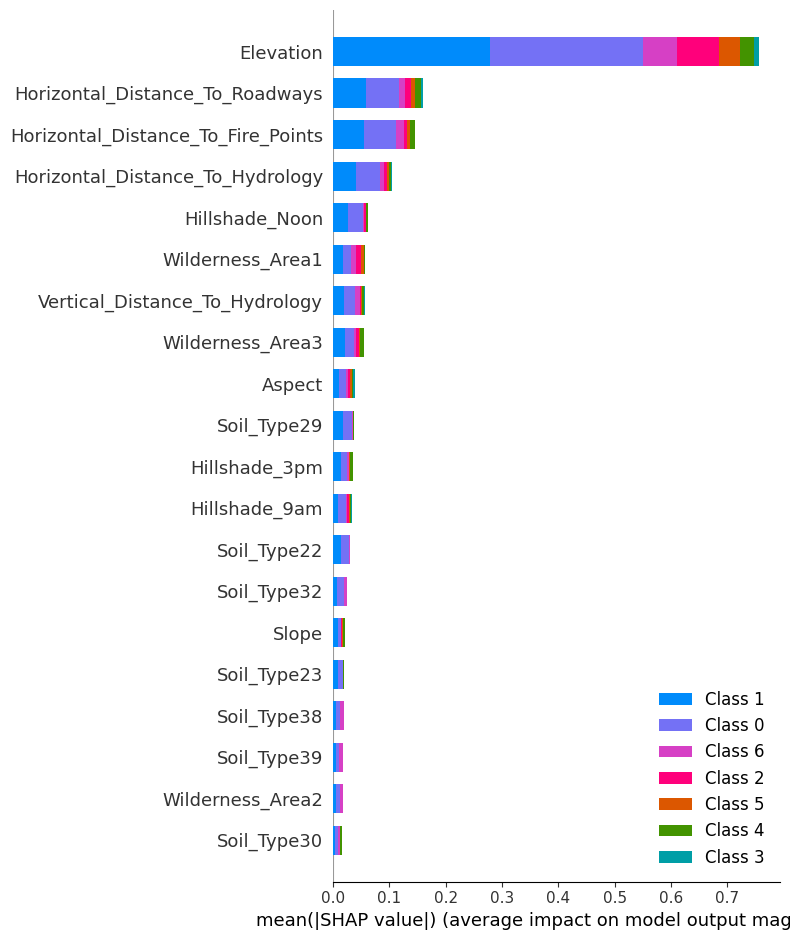

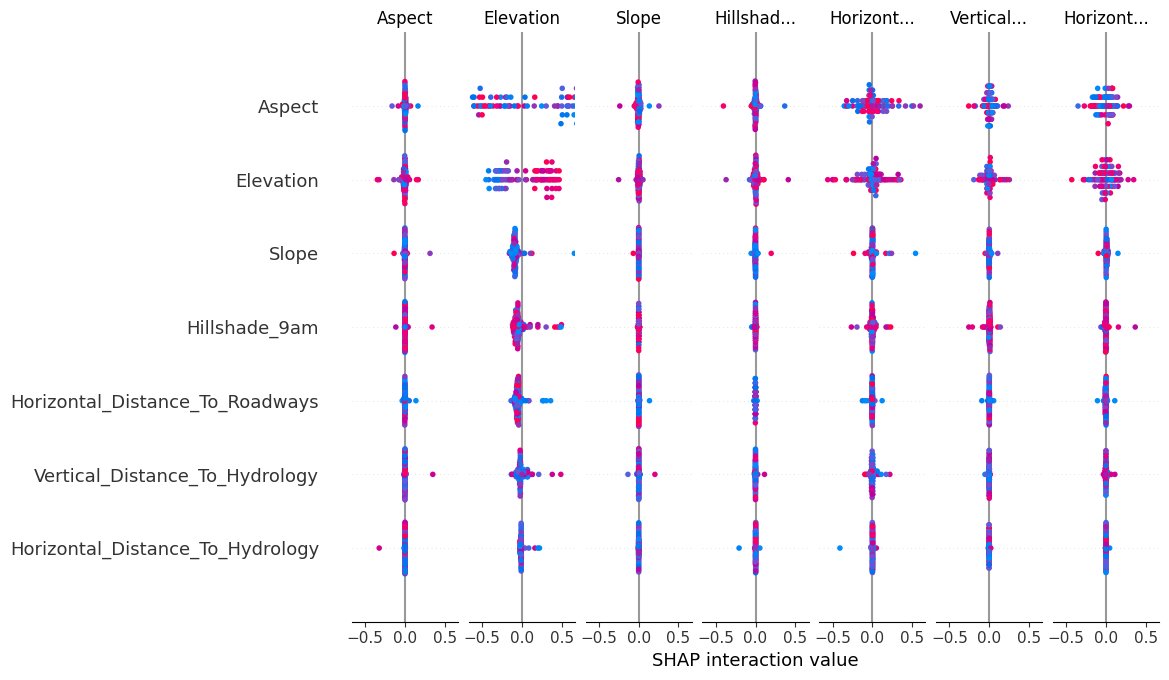

In [6]:
decision_tree_explainer = shap.TreeExplainer(decision_tree_model)

shap_values_tree = decision_tree_explainer.shap_values(X_sample)

shap.summary_plot(
    shap_values_tree, 
    X_sample, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_tree,
    X_sample,
    plot_type="beeswarm"
)


## KNN SHAP Interpretibility 

In [ ]:
X_sample_scaled = X_test_scaled[:20]
knn_explainer = shap.KernelExplainer(knn_model.predict_proba, X_sample_scaled)

shap_values_knn = knn_explainer.shap_values(X_sample_scaled, n_samples=100)

  0%|          | 0/20 [00:00<?, ?it/s]

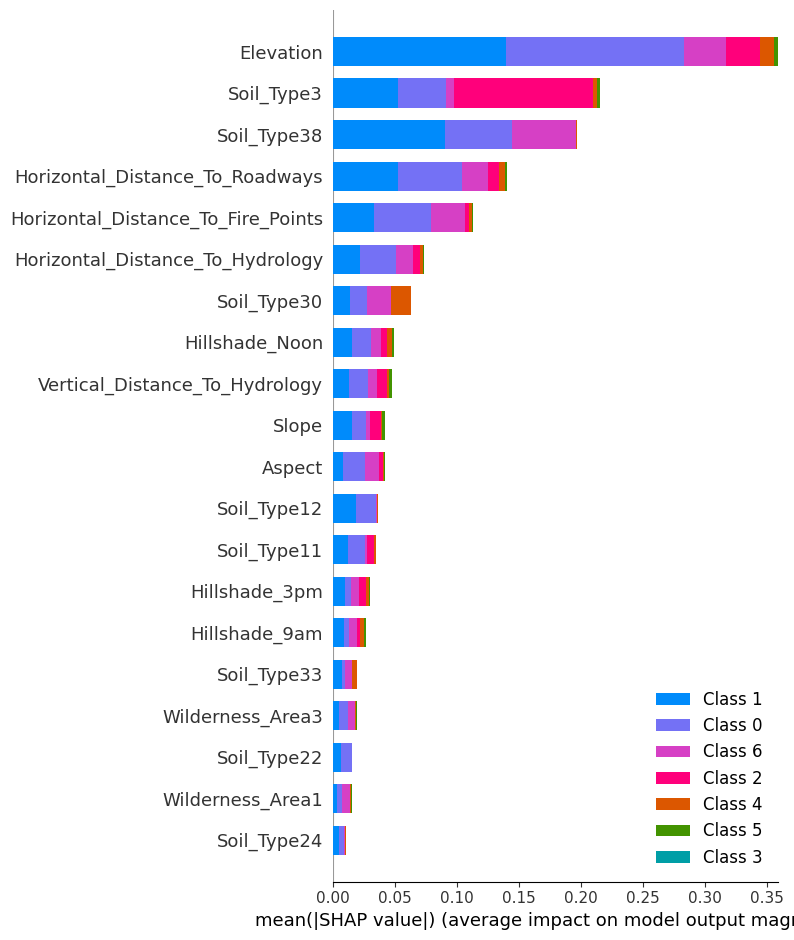

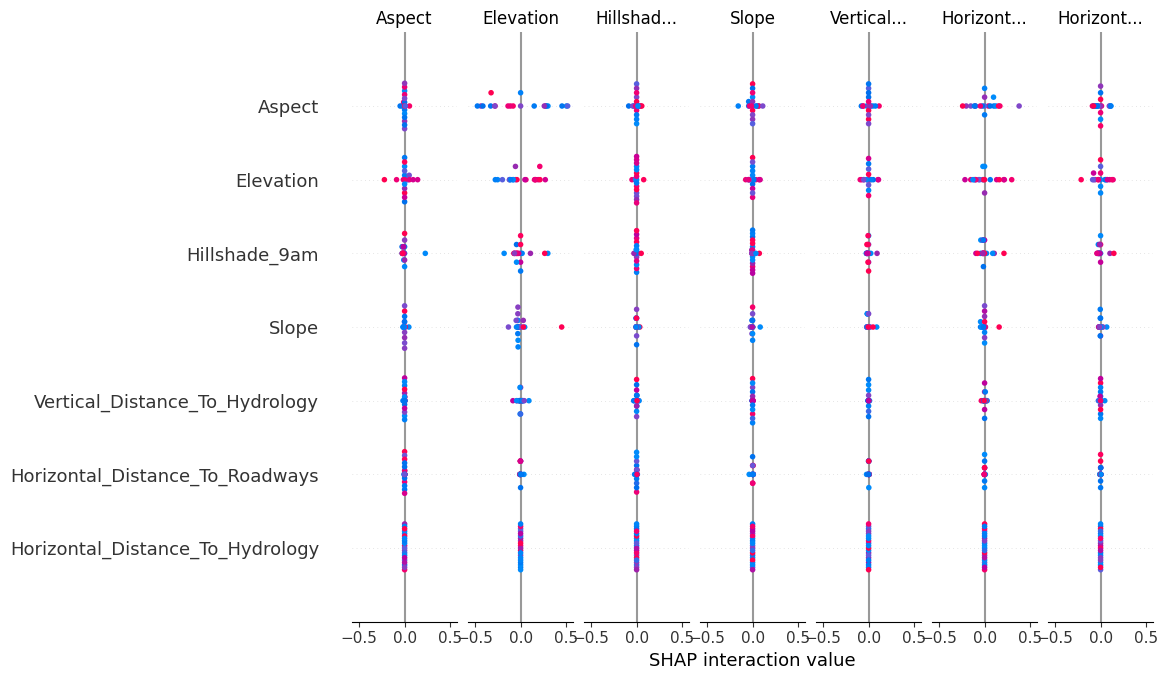

In [8]:
shap.summary_plot(
    shap_values_knn, 
    X_sample_scaled, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_knn,
    X_sample_scaled,
    plot_type="beeswarm"
)

## Neural Network Interpretability

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


  1%|          | 1/100 [00:17<29:33, 17.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


  2%|▏         | 2/100 [00:33<27:29, 16.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  3%|▎         | 3/100 [00:48<25:48, 15.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  4%|▍         | 4/100 [01:03<24:25, 15.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  5%|▌         | 5/100 [01:17<23:53, 15.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  6%|▌         | 6/100 [01:32<23:07, 14.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  7%|▋         | 7/100 [01:45<22:27, 14.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  8%|▊         | 8/100 [01:59<21:47, 14.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  9%|▉         | 9/100 [02:13<21:18, 14.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 10%|█         | 10/100 [02:26<20:55, 13.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 11%|█         | 11/100 [02:40<20:33, 13.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 12%|█▏        | 12/100 [02:54<20:15, 13.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 13%|█▎        | 13/100 [03:07<19:54, 13.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 14%|█▍        | 14/100 [03:21<19:36, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 15%|█▌        | 15/100 [03:35<19:23, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 16%|█▌        | 16/100 [03:48<19:06, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 17%|█▋        | 17/100 [04:02<18:48, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 18%|█▊        | 18/100 [04:16<18:48, 13.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 19%|█▉        | 19/100 [04:29<18:29, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 20%|██        | 20/100 [04:43<18:14, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 21%|██        | 21/100 [04:57<18:01, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 22%|██▏       | 22/100 [05:10<17:44, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 23%|██▎       | 23/100 [05:24<17:28, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 24%|██▍       | 24/100 [05:38<17:17, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 25%|██▌       | 25/100 [05:51<17:01, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 26%|██▌       | 26/100 [06:05<16:57, 13.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 27%|██▋       | 27/100 [06:19<16:39, 13.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 28%|██▊       | 28/100 [06:32<16:23, 13.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 29%|██▉       | 29/100 [06:46<16:08, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 30%|███       | 30/100 [07:00<15:56, 13.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 31%|███       | 31/100 [07:13<15:40, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 32%|███▏      | 32/100 [07:27<15:25, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 33%|███▎      | 33/100 [07:40<15:08, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 34%|███▍      | 34/100 [07:54<14:56, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 35%|███▌      | 35/100 [08:07<14:44, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 36%|███▌      | 36/100 [08:21<14:30, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 37%|███▋      | 37/100 [08:34<14:13, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 38%|███▊      | 38/100 [08:48<14:02, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 39%|███▉      | 39/100 [09:02<13:48, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 40%|████      | 40/100 [09:15<13:32, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 41%|████      | 41/100 [09:29<13:21, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 42%|████▏     | 42/100 [09:42<13:08, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 43%|████▎     | 43/100 [09:56<12:53, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 44%|████▍     | 44/100 [10:10<12:42, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 45%|████▌     | 45/100 [10:23<12:28, 13.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 46%|████▌     | 46/100 [10:37<12:18, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 47%|████▋     | 47/100 [10:51<12:10, 13.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 48%|████▊     | 48/100 [11:05<11:53, 13.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 49%|████▉     | 49/100 [11:18<11:37, 13.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 50%|█████     | 50/100 [11:32<11:23, 13.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 51%|█████     | 51/100 [11:46<11:08, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 52%|█████▏    | 52/100 [11:59<10:53, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 53%|█████▎    | 53/100 [12:13<10:38, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 54%|█████▍    | 54/100 [12:26<10:25, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 55%|█████▌    | 55/100 [12:40<10:10, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 56%|█████▌    | 56/100 [12:53<09:57, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 57%|█████▋    | 57/100 [13:07<09:44, 13.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 58%|█████▊    | 58/100 [13:20<09:28, 13.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 59%|█████▉    | 59/100 [13:34<09:16, 13.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 60%|██████    | 60/100 [13:48<09:03, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 61%|██████    | 61/100 [14:01<08:48, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 62%|██████▏   | 62/100 [14:15<08:34, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 63%|██████▎   | 63/100 [14:28<08:19, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 64%|██████▍   | 64/100 [14:42<08:05, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 65%|██████▌   | 65/100 [14:55<07:53, 13.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 66%|██████▌   | 66/100 [15:09<07:38, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 67%|██████▋   | 67/100 [15:22<07:27, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 68%|██████▊   | 68/100 [15:36<07:16, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 69%|██████▉   | 69/100 [15:50<07:02, 13.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 70%|███████   | 70/100 [16:03<06:47, 13.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 71%|███████   | 71/100 [16:17<06:33, 13.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 72%|███████▏  | 72/100 [16:30<06:18, 13.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 73%|███████▎  | 73/100 [16:43<06:03, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 74%|███████▍  | 74/100 [16:57<05:49, 13.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 75%|███████▌  | 75/100 [17:11<05:43, 13.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 76%|███████▌  | 76/100 [17:25<05:27, 13.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 77%|███████▋  | 77/100 [17:38<05:11, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 78%|███████▊  | 78/100 [17:52<04:58, 13.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 79%|███████▉  | 79/100 [18:05<04:44, 13.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 80%|████████  | 80/100 [18:19<04:30, 13.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 81%|████████  | 81/100 [18:32<04:16, 13.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 82%|████████▏ | 82/100 [18:45<04:02, 13.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 83%|████████▎ | 83/100 [18:59<03:48, 13.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 84%|████████▍ | 84/100 [19:12<03:34, 13.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 85%|████████▌ | 85/100 [19:25<03:20, 13.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 86%|████████▌ | 86/100 [19:39<03:07, 13.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 87%|████████▋ | 87/100 [19:52<02:53, 13.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 88%|████████▊ | 88/100 [20:06<02:40, 13.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 89%|████████▉ | 89/100 [20:19<02:26, 13.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 90%|█████████ | 90/100 [20:32<02:13, 13.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 91%|█████████ | 91/100 [20:46<02:00, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 92%|█████████▏| 92/100 [20:59<01:47, 13.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 93%|█████████▎| 93/100 [21:13<01:33, 13.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 94%|█████████▍| 94/100 [21:26<01:20, 13.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 95%|█████████▌| 95/100 [21:40<01:07, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 96%|█████████▌| 96/100 [21:53<00:53, 13.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 97%|█████████▋| 97/100 [22:07<00:40, 13.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 98%|█████████▊| 98/100 [22:20<00:26, 13.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 99%|█████████▉| 99/100 [22:33<00:13, 13.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


100%|██████████| 100/100 [22:47<00:00, 13.67s/it]


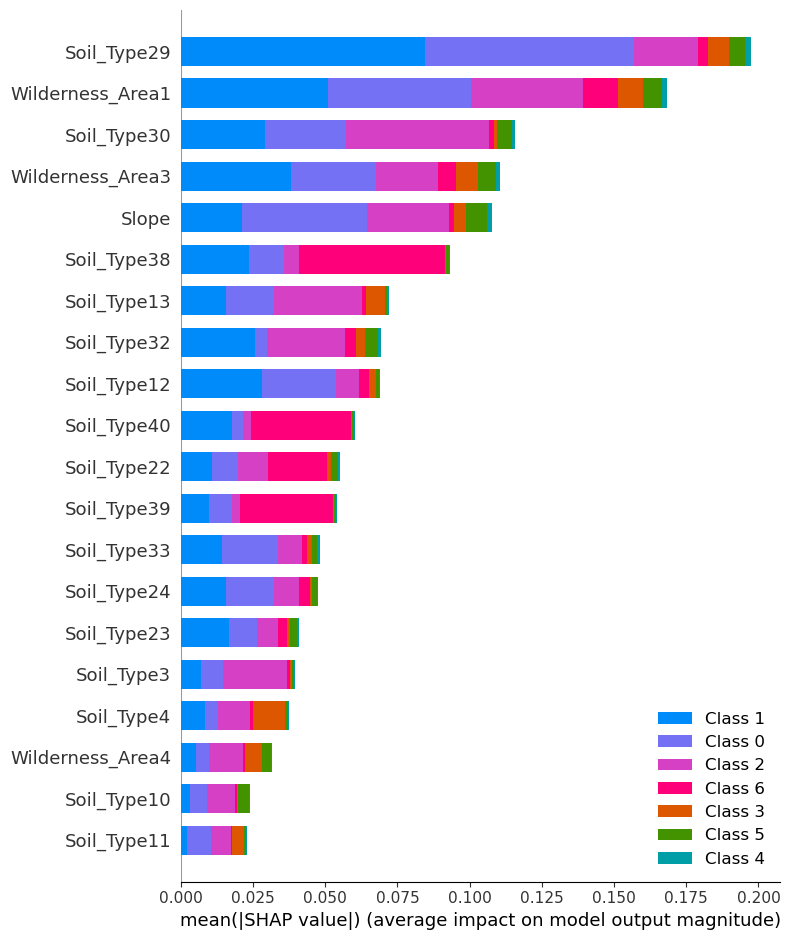

<Figure size 640x480 with 0 Axes>

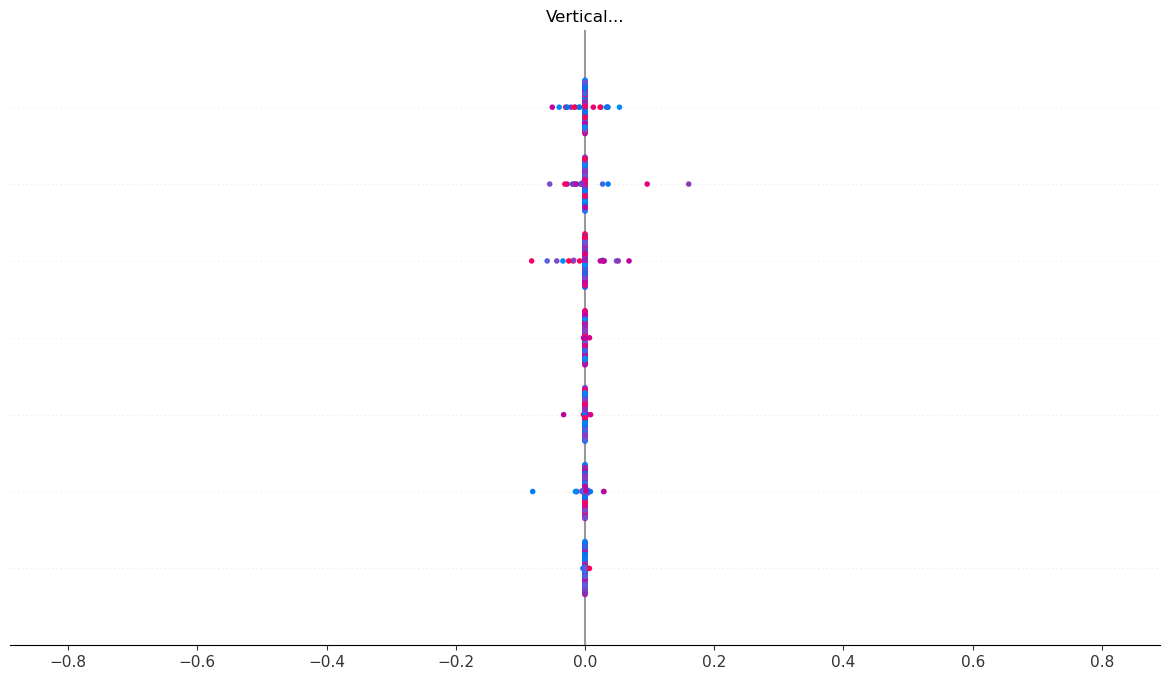

In [7]:
neural_model = load('../data/best_neural_network_no_regs.joblib')
neural_network_explainer = shap.KernelExplainer(neural_model.predict, X_sample_scaled)

shap_values_neural = neural_network_explainer.shap_values(X_sample_scaled)

shap.summary_plot(
    shap_values_neural,
    X_sample,
    plot_type="bar",
)
shap.summary_plot(
    shap_values_neural,
    X_sample,
    plot_type="beeswarm"
)

evaluation description can be in slides

knn-specific
underfitting/overfitting based on manual models

for network, add layers until overfitting, then take things about
gridsearch
keras tuner